In [1]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import numpy as np
import seaborn as sns

## Import data and EDA

In [109]:
df=pd.read_csv('delivery_time.csv')

In [110]:
df

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [4]:
df['Delivery Time'].shape

(21,)

In [5]:
df.describe()

,Delivery Time,Sorting Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


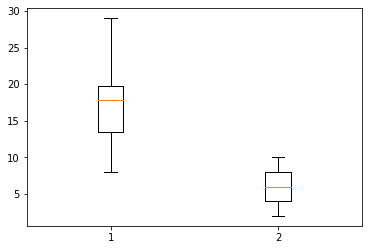

In [7]:
plt.boxplot(df)
plt.show()

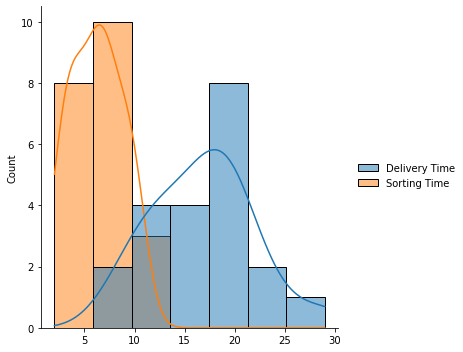

In [8]:
sns.displot(df,kde=True)

In [15]:
df.iloc[:,0:1]

,Delivery Time
0,21.00
1,13.50
2,19.75
3,24.00
4,29.00
5,15.35
6,19.00
7,9.50
8,17.90
9,18.75


## Scaling Delivery Time
### Since Delivery time is almost normal, applying standard scalar

In [118]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler
#mmc=MinMaxScaler()
#scaled_df=pd.DataFrame(mmc.fit_transform(df.iloc[:,0:1]))


sc=StandardScaler()
scaled_df=pd.DataFrame(sc.fit_transform(df.iloc[:,0:1]))
#scaled_df=np.log(scaled_df)
scaled_df

,0
0,0.849867
1,-0.664490
2,0.597474
3,1.455610
4,2.465181
5,-0.290949
6,0.446038
7,-1.472148
8,0.223933
9,0.395560


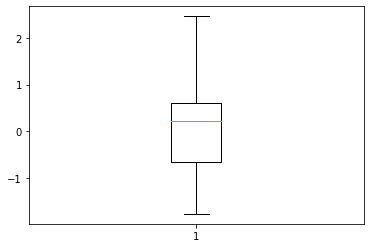

In [119]:
plt.boxplot(scaled_df)
plt.show()

In [116]:
scaled_df,df['Sorting Time']

(           0
 0   0.849867
 1  -0.664490
 2   0.597474
 3   1.455610
 4   2.465181
 5  -0.290949
 6   0.446038
 7  -1.472148
 8   0.223933
 9   0.395560
 10  0.613627
 11 -1.219755
 12 -0.022403
 13 -1.068319
 14 -0.961304
 15 -0.385849
 16 -0.614012
 17  0.266335
 18 -1.775019
 19  0.209799
 20  0.950824,
 0     10
 1      4
 2      6
 3      9
 4     10
 5      6
 6      7
 7      3
 8     10
 9      9
 10     8
 11     4
 12     7
 13     3
 14     3
 15     4
 16     6
 17     7
 18     2
 19     7
 20     5
 Name: Sorting Time, dtype: int64)

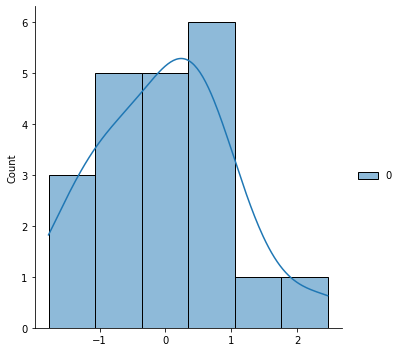

In [162]:
#import numpy as np
#sns.displot(np.log(scaled_df),kde='True')
sns.displot(scaled_df,kde='True')

In [133]:
xTr,xTe,yTr,yTe=train_test_split(df.iloc[:,1:],scaled_df,random_state=3)

In [134]:
yTe

,0
19,0.209799
13,-1.068319
1,-0.664490
2,0.597474
18,-1.775019
15,-0.385849


## Model creation, fit and predict

In [136]:
model=LinearRegression(fit_intercept=True)
model.fit(xTr,yTr)

LinearRegression()

In [137]:
model.score(xTe,yTe)

0.792190867112274

In [144]:
y_pred=sc.inverse_transform(model.predict(xTe))
xTe,y_pred

(    Sorting Time
 19             7
 13             3
 1              4
 2              6
 18             2
 15             4,
 array([[17.91962219],
        [11.342291  ],
        [12.98662379],
        [16.27528939],
        [ 9.6979582 ],
        [12.98662379]]))

In [151]:
residuals=sc.inverse_transform(yTe)-y_pred

In [152]:
res_df=pd.DataFrame([])
res_df[0]=xTe
res_df[1]=residuals
res_df

,0,1
19,7,-0.089622
13,3,0.157709
1,4,0.513376
2,6,3.474711
18,2,-1.697958
15,4,1.893376


[Text(0.5, 0, 'Sorting Time'), Text(0, 0.5, 'Error')]

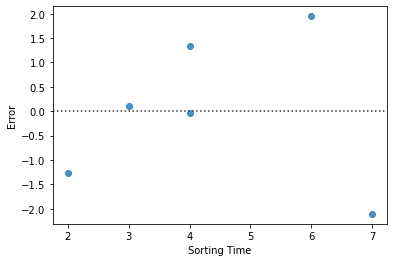

In [155]:
p=sns.residplot(x=res_df[0],y=res_df[1],data=res_df)
p.set(xlabel='Sorting Time',ylabel='Error')

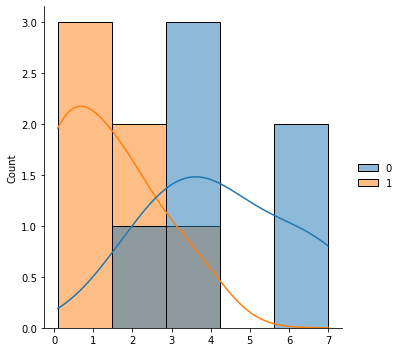

In [160]:
sns.displot(abs(res_df),kde=True)

In [161]:
sc.inverse_transform(model.predict([[12]]))

array([[26.14128617]])